In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define an $n\times n$ non-positive semidefinite kernel matrix whose entries are the difference between the row number and the column number of that entry. <br><br>
Use this kernel matrix to generate $n$ points from each of $n_f$ zero-mean training functions. <br><br>
Plot the first training function. 

c:\users\yowza\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  del sys.path[0]


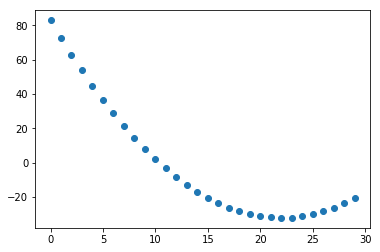

In [14]:
n_f = 100 #number of training functions to generate
n = 30 #number of points per training function

# Kernel matrix generator
K_obs = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K_obs[i,j] = np.square(i-j)

#make n_f functions on which to train
f_train = np.zeros((n_f, n))
for i in range(n_f):
    f_train[i,:] = np.random.multivariate_normal(np.zeros(n), K_obs)

#plot the first training observation just to see
plt.close()
plt.scatter(np.arange(n), f_train[0])

In [7]:
K_obs

array([[0., 1., 2., 3., 4.],
       [1., 0., 1., 2., 3.],
       [2., 1., 0., 1., 2.],
       [3., 2., 1., 0., 1.],
       [4., 3., 2., 1., 0.]])

Starting with the $n_f\times n$ matrix of $n_f$ training functions, learn a squared exponential kernel <br>
cov$(f(x_p),f(x_q))=k(x_p,x_q)=$exp$(-\frac{1}{2}\mid x_p-x_q\mid ^2)$,  <br>
and generate zero-mean functions from to this kernel. <br><br>
This should generate functions similar to the training functions above while having the advantage of a pos def kernel matrix. 

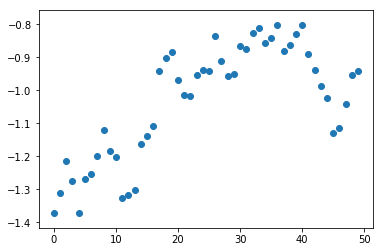

In [145]:
#squared exponential covariance function
def sq_exp(xp, xq, length_scale=0.00001): 
    return np.exp(-length_scale*np.linalg.norm(xp-xq)**2)

#create covariance matrix. Xp, Xq must have the same number of rows (aka same number of features). 
def getK(Xp, Xq, func=sq_exp):
    assert Xp.shape[1] == Xq.shape[1], 'Xp, Xq have different numbers of features'
    K=np.zeros((Xp.shape[1],Xq.shape[1]))
    for i in range(K.shape[1]):
        for j in range(K.shape[1]):
            K[i,j] = sq_exp(Xp[:,i], Xq[:,j])
    return K

K = getK(f_train, f_train)
    
#set covariance matrix
random_func = np.random.multivariate_normal(np.zeros(n), K)

#plot a random function trained on training data
plt.close()
plt.scatter(np.arange(n), random_func)

In [4]:
f_train.shape

(100, 50)